In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image, ImageEnhance, ImageOps, ImageFilter
import os, random
import numpy as np
from tqdm import tqdm

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Input/Output folder
base_folder = "/content/drive/MyDrive/Defense_2/DATASET_2"  # change if needed
TARGET_IMAGES = 1000

def augment_image(image):
    """Applies one of several random augmentations to an image."""
    aug_type = random.choice([
        "rotate", "h_flip", "v_flip", "brightness", "contrast","blur"

    ])

    if aug_type == "rotate":
        angle = random.uniform(-45, 45)
        image = image.rotate(angle, expand=True, fillcolor="white")

    elif aug_type == "h_flip":
        image = ImageOps.mirror(image)

    elif aug_type == "v_flip":
        image = ImageOps.flip(image)

    elif aug_type == "brightness":
        enhancer = ImageEnhance.Brightness(image)
        image = enhancer.enhance(random.uniform(0.7, 1.3))

    elif aug_type == "contrast":
        enhancer = ImageEnhance.Contrast(image)
        image = enhancer.enhance(random.uniform(0.7, 1.3))

    elif aug_type == "blur":
        image = image.filter(ImageFilter.GaussianBlur(radius=random.uniform(0.5, 2.5)))

    return image

# --- PROCESSING LOOP ---
for folder_name in os.listdir(base_folder):
    folder_path = os.path.join(base_folder, folder_name)
    if not os.path.isdir(folder_path):
        continue

    print(f"📂 Processing folder: {folder_name}")

    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('png','jpg','jpeg'))]
    image_files.sort()
    original_count = len(image_files)

    # If already enough, just normalize filenames
    if original_count >= TARGET_IMAGES:
        for i, file in enumerate(image_files[:TARGET_IMAGES], start=1):
            os.rename(os.path.join(folder_path, file), os.path.join(folder_path, f"{i}.jpg"))
        continue

    # Rename originals
    temp_names = []
    for i, file in enumerate(image_files, start=1):
        temp_name = os.path.join(folder_path, f"_temp_{i}.jpg")
        os.rename(os.path.join(folder_path, file), temp_name)
        temp_names.append(temp_name)

    for i, temp_name in enumerate(temp_names, start=1):
        os.rename(temp_name, os.path.join(folder_path, f"{i}.jpg"))

    # Augment new images
    image_files = [f"{i}.jpg" for i in range(1, original_count + 1)]
    new_needed = TARGET_IMAGES - original_count
    print(f"🔄 Generating {new_needed} augmented images...")

    for i in tqdm(range(new_needed)):
        img_path = os.path.join(folder_path, random.choice(image_files))
        img = Image.open(img_path).convert("RGB")
        aug_img = augment_image(img)
        new_path = os.path.join(folder_path, f"{original_count + i + 1}.jpg")
        aug_img.save(new_path, quality=95)

    print(f"✅ Completed {folder_name}\n")

print("🎉 All folders done!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📂 Processing folder: Noisy
🔄 Generating 587 augmented images...


100%|██████████| 587/587 [00:08<00:00, 70.24it/s]


✅ Completed Noisy

📂 Processing folder: Healthy
🔄 Generating 363 augmented images...


 10%|▉         | 35/363 [00:00<00:04, 81.54it/s]/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 363/363 [00:04<00:00, 78.57it/s]


✅ Completed Healthy

📂 Processing folder: Parkinson's
🔄 Generating 475 augmented images...


100%|██████████| 475/475 [00:06<00:00, 72.88it/s]

✅ Completed Parkinson's

🎉 All folders done!


In [ ]:
from PIL import Image
import os
import numpy as np
from tqdm import tqdm

# Input folder (change path if needed)
base_folder = "/content/drive/MyDrive/Defense_2/DATASET_2"

# Output folder for preprocessed arrays
output_folder = "/content/drive/MyDrive/Defense_2/PREPROCESSED_2"
os.makedirs(output_folder, exist_ok=True)

# Image preprocessing parameters
TARGET_SIZE = (224, 224)  # Change to your model's expected input size

def preprocess_image(img_path):
    # Open, resize, convert to numpy, normalize
    img = Image.open(img_path).convert('RGB')
    img = img.resize(TARGET_SIZE)
    arr = np.array(img) / 255.0  # Normalize to [0,1]
    return arr

for folder_name in os.listdir(base_folder):
    folder_path = os.path.join(base_folder, folder_name)
    if not os.path.isdir(folder_path):
        continue

    print(f"🖼️ Preprocessing images in: {folder_name}")

    # List of image arrays
    image_arrays = []
    for file in tqdm(sorted(os.listdir(folder_path))):
        if not file.lower().endswith('.jpg'):
            continue
        img_path = os.path.join(folder_path, file)
        img_arr = preprocess_image(img_path)
        image_arrays.append(img_arr)

    image_arrays = np.stack(image_arrays)
    np.save(os.path.join(output_folder, f"{folder_name}_images.npy"), image_arrays)
    print(f"✅ Saved to {output_folder}/{folder_name}_images.npy\n")

print("🎉 All preprocessing done!")

🖼️ Preprocessing images in: Noisy


100%|██████████| 1000/1000 [00:11<00:00, 90.88it/s] 


✅ Saved to /content/drive/MyDrive/Defense_2/PREPROCESSED_2/Noisy_images.npy

🖼️ Preprocessing images in: Healthy


100%|██████████| 1000/1000 [00:11<00:00, 90.76it/s]


✅ Saved to /content/drive/MyDrive/Defense_2/PREPROCESSED_2/Healthy_images.npy

🖼️ Preprocessing images in: Parkinson's


100%|██████████| 1000/1000 [00:10<00:00, 98.85it/s]


✅ Saved to /content/drive/MyDrive/Defense_2/PREPROCESSED_2/Parkinson's_images.npy

🎉 All preprocessing done!


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.morphology import skeletonize, remove_small_objects
from skimage.measure import label, regionprops, shannon_entropy
from skimage.util import img_as_ubyte, img_as_bool
from scipy.ndimage import distance_transform_edt, binary_opening, binary_closing
from scipy.signal import savgol_filter
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

# ---------------------------
# Utility helpers
# ---------------------------
def safe_div(a, b, default=np.nan):
    return a / b if (b is not None and b != 0) else default

def iqr_trim(values, k=1.5):
    if values.size == 0:
        return values
    q1, q3 = np.percentile(values, [25, 75])
    iqr = q3 - q1
    low, high = q1 - k*iqr, q3 + k*iqr
    return values[(values >= low) & (values >= high)]

def keep_largest_component(binary):
    # binary: bool array where True = foreground (stroke)
    lbl = label(binary, connectivity=2)
    if lbl.max() == 0:
        return binary
    regions = regionprops(lbl)
    largest = max(regions, key=lambda r: r.area).label
    return lbl == largest

def auto_binarize(gray):
    # CLAHE + Otsu + adaptive fallback; auto-polarity (ink may be dark or light)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    g2 = clahe.apply(gray)

    # Otsu both polarities
    _, th_dark = cv2.threshold(g2, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) # ink darker
    _, th_light = cv2.threshold(g2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)    # ink lighter

    # Pick polarity that yields more reasonable stroke pixels but not >50% of image
    def score(b):
        p = (b==255).mean()
        # Prefer 1%–35% foreground coverage range
        return -abs(p - 0.18)

    cand = th_dark if score(th_dark) >= score(th_light) else th_light

    # If coverage too small/large, try adaptive
    fg_ratio = (cand==255).mean()
    if fg_ratio < 0.01 or fg_ratio > 0.6:
        ad = cv2.adaptiveThreshold(g2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 35, 5)
        cand = ad

    # Ensure foreground = 1 (True)
    if cand.mean() > 0.5:
        # too white -> invert to make strokes True
        cand = 255 - cand
    binary = cand // 255
    return binary.astype(bool)

def morph_clean(bw, open_iters=1, close_iters=1):
    if open_iters > 0:
        bw = binary_opening(bw, iterations=open_iters)
    if close_iters > 0:
        bw = binary_closing(bw, iterations=close_iters)
    bw = remove_small_objects(bw, min_size=64)
    return bw

def get_main_contour(bw_uint8):
    # findContours expects uint8 0/255, foreground white
    contours, _ = cv2.findContours(bw_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    if not contours:
        return None
    cnt = max(contours, key=cv2.contourArea)
    return cnt

def smooth_contour(cnt, window=21, poly=3):
    # cnt: Nx1x2 -> Nx2
    arr = cnt[:,0,:].astype(np.float64)
    n = len(arr)
    if n < window:
        window = max(5, (n//2)*2 + 1)  # ensure odd, <= n
    if window < 5:
        # too short to smooth
        return arr
    x = arr[:,0]
    y = arr[:,1]
    xs = savgol_filter(x, window_length=window, polyorder=min(poly, window-2), mode='interp')
    ys = savgol_filter(y, window_length=window, polyorder=min(poly, window-2), mode='interp')
    return np.stack([xs, ys], axis=1)

def curvature_stats(path):
    # path: Nx2
    if path.shape[0] < 5:
        return dict(k_mean=np.nan, k_std=np.nan, k_p95=np.nan)
    dx = np.gradient(path[:,0])
    dy = np.gradient(path[:,1])
    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    denom = (dx*dx + dy*dy)**1.5
    kappa = np.zeros_like(dx)
    mask = denom > 1e-9
    kappa[mask] = np.abs(dx[mask]*ddy[mask] - dy[mask]*ddx[mask]) / denom[mask]
    # robust stats
    kappa_f = iqr_trim(kappa[~np.isnan(kappa)])
    if kappa_f.size == 0:
        return dict(k_mean=np.nan, k_std=np.nan, k_p95=np.nan)
    return dict(k_mean=float(np.mean(kappa_f)),
                k_std=float(np.std(kappa_f)),
                k_p95=float(np.percentile(kappa_f, 95)))

def stroke_width_stats(bin_uint8):
    # EDT on inverted (background=0, stroke=255) → use distance to background on stroke
    dist = distance_transform_edt(bin_uint8>0)
    # thickness (diameter) ≈ 2*dist on skeleton pixels
    skel = skeletonize((bin_uint8>0)).astype(np.uint8)
    thickness = dist * skel * 2.0
    vals = thickness[thickness > 0].astype(np.float64)
    vals = iqr_trim(vals)
    if vals.size == 0:
        return dict(sw_mean=np.nan, sw_std=np.nan, sw_p95=np.nan)
    return dict(sw_mean=float(np.mean(vals)), sw_std=float(np.std(vals)), sw_p95=float(np.percentile(vals,95)))

def radial_features(path):
    # centroid
    cx, cy = np.mean(path[:,0]), np.mean(path[:,1])
    dx = path[:,0] - cx
    dy = path[:,1] - cy
    r = np.hypot(dx, dy)
    theta = np.arctan2(dy, dx)
    # unwrap for monotonic analysis
    theta_unw = np.unwrap(theta)
    # Δθ-based wobble
    dtheta = np.diff(theta_unw)
    wobble = float(np.std(dtheta)) if dtheta.size else np.nan
    # turns count ~ total angle span / (2π)
    turns = float(np.abs(theta_unw[-1] - theta_unw[0]) / (2*np.pi)) if theta_unw.size > 1 else np.nan
    # radial stats
    r_f = iqr_trim(r)
    return r, theta_unw, dict(
        radial_mean=float(np.mean(r_f)) if r_f.size else np.nan,
        radial_std=float(np.std(r_f)) if r_f.size else np.nan,
        wobble=wobble,
        turns=turns
    )

def fit_archimedean_spiral(r, theta_unw):
    # Fit r ≈ a + b*theta (OLS)
    if len(r) < 10:
        return dict(a=np.nan, b=np.nan, rmse=np.nan, mae=np.nan, r2=np.nan)
    X = np.vstack([np.ones_like(theta_unw), theta_unw]).T
    # Solve least squares
    beta, *_ = np.linalg.lstsq(X, r, rcond=None)
    a, b = beta
    r_pred = a + b*theta_unw
    resid = r - r_pred
    rmse = float(np.sqrt(np.mean(resid**2)))
    mae  = float(np.mean(np.abs(resid)))
    ss_res = np.sum(resid**2)
    ss_tot = np.sum((r - np.mean(r))**2) + 1e-12
    r2 = float(1 - ss_res/ss_tot)
    return dict(a=float(a), b=float(b), rmse=rmse, mae=mae, r2=r2)

def radial_error_to_ideal(path, a=1.0, b=4.0):
    # Compare to a canonical ideal spiral (after centering & scale-normalization)
    cx, cy = np.mean(path[:,0]), np.mean(path[:,1])
    dx = path[:,0] - cx
    dy = path[:,1] - cy
    r = np.hypot(dx, dy)
    theta = np.unwrap(np.arctan2(dy, dx))
    r_ideal = a + b*theta
    # Normalize scales by median radius to reduce absolute-size bias
    med_r = np.median(r) if r.size else 1.0
    if med_r == 0: med_r = 1.0
    r_n = r / med_r
    r_i = r_ideal / np.median(r_ideal) if np.median(r_ideal)!=0 else r_ideal
    diff = r_n - r_i
    if diff.size == 0:
        return dict(rad_err_mean=np.nan, rad_err_med=np.nan, rad_err_max=np.nan)
    return dict(rad_err_mean=float(np.mean(np.abs(diff))),
                rad_err_med=float(np.median(np.abs(diff))),
                rad_err_max=float(np.max(np.abs(diff))))

def contour_metrics(cnt):
    area = cv2.contourArea(cnt)
    peri = cv2.arcLength(cnt, True)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect = safe_div(w, h)
    compact = safe_div(peri**2, (4*np.pi*area)) if area>0 else np.nan
    circularity = safe_div(4*np.pi*area, peri**2) if peri>0 else np.nan
    # symmetry: radius uniformity around centroid
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cx = M['m10']/M['m00']; cy = M['m01']/M['m00']
        radii = np.hypot(cnt[:,0,0]-cx, cnt[:,0,1]-cy)
        sym = safe_div(np.mean(radii), np.std(radii)) if np.std(radii)>0 else np.nan
    else:
        sym = np.nan
    # stroke length along contour
    pts = cnt[:,0,:]
    diffs = np.diff(pts, axis=0)
    stroke_len = float(np.sum(np.hypot(diffs[:,0], diffs[:,1])))
    return dict(area=float(area), perimeter=float(peri), aspect_ratio=float(aspect) if aspect==aspect else np.nan,
                compactness=float(compact) if compact==compact else np.nan,
                circularity=float(circularity) if circularity==circularity else np.nan,
                symmetry_score=float(sym) if sym==sym else np.nan,
                stroke_length=round(stroke_len,2))

def skeleton_graph_features(bw_bool):
    skel = skeletonize(bw_bool).astype(np.uint8)
    # Endpoints: pixels with exactly 1 neighbor; Branchpoints: >=3 neighbors
    kernel = np.array([[1,1,1],[1,10,1],[1,1,1]], dtype=np.uint8)
    neigh = cv2.filter2D(skel, -1, kernel)
    # For center value 10, neighbors add 1 each
    ep = np.logical_and(skel==1, neigh==11)     # 10 + 1 neighbor
    bp = np.logical_and(skel==1, neigh>=13)     # 10 + >=3 neighbors
    endpoints = int(np.count_nonzero(ep))
    branchpts = int(np.count_nonzero(bp))
    # Skeleton length ~ count of skeleton pixels
    skel_len = int(np.count_nonzero(skel))
    return skel, dict(skel_endpoints=endpoints, skel_branchpoints=branchpts, skel_length=skel_len)

def fractal_dimension_boxcount(bw_bool):
    # Compute on skeleton to focus on stroke centerline
    skel = skeletonize(bw_bool)
    Z = skel.astype(np.uint8)
    if Z.sum() == 0:
        return np.nan
    # Box-counting
    sizes = []
    counts = []
    # Use powers of 2
    p = int(np.floor(np.log2(min(Z.shape))))
    for k in range(p, 1, -1):
        s = 2**k
        sizes.append(s)
        # pad to multiple of s
        new_shape = (int(np.ceil(Z.shape[0]/s))*s, int(np.ceil(Z.shape[1]/s))*s)
        pad = np.zeros(new_shape, dtype=np.uint8)
        pad[:Z.shape[0], :Z.shape[1]] = Z
        # count non-empty boxes
        S = pad.reshape(new_shape[0]//s, s, new_shape[1]//s, s).any(axis=(1,3))
        counts.append(np.count_nonzero(S))
    if len(counts) < 2:
        return np.nan
    sizes = np.array(sizes, dtype=np.float64)
    counts = np.array(counts, dtype=np.float64) + 1e-9
    # slope of log(N) vs log(1/s)
    x = np.log(1.0/sizes)
    y = np.log(counts)
    slope, _ = np.polyfit(x, y, 1)
    return float(slope)

# ---------------------------
# Main extraction
# ---------------------------
def extract_features_from_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None

    # 1) Preprocess → binary (stroke=True)
    bw = auto_binarize(img)
    bw = morph_clean(bw, open_iters=1, close_iters=1)
    bw = keep_largest_component(bw)

    # Save two versions for different ops
    bw_bool = bw.astype(bool)
    bw_u8   = (bw_bool.astype(np.uint8))*255

    # Global entropy (skimage)
    entropy = float(shannon_entropy(img_as_ubyte(img)))

    # 2) Skeleton & width
    sw = stroke_width_stats(bw_u8)

    # 3) Contour (largest)
    cnt = get_main_contour(bw_u8)
    if cnt is None or len(cnt) < 5:
        # Return minimal info
        skel, skf = skeleton_graph_features(bw_bool)
        return dict(
            Mean_Thickness=sw['sw_mean'], Std_Thickness=sw['sw_std'], Thickness_P95=sw['sw_p95'],
            Entropy=round(entropy,2), **skf,
            # the rest NaN
            Loop_Variation=np.nan, Jerkiness=np.nan, Curv_Mean=np.nan, Curv_Std=np.nan, Curv_P95=np.nan,
            Path_RMSE=np.nan, Path_MAE=np.nan, Spiral_R2=np.nan, Spiral_a=np.nan, Spiral_b=np.nan,
            Rad_Err_Mean=np.nan, Rad_Err_Med=np.nan, Rad_Err_Max=np.nan,
            Stroke_Length=np.nan, Aspect_Ratio=np.nan, Compactness=np.nan, Circularity=np.nan, Symmetry_Score=np.nan,
            Radial_Mean=np.nan, Radial_Std=np.nan, Wobble=np.nan, Turns=np.nan,
            Fractal_Dim=np.nan
        )

    # 4) Smooth path & curvature/jerkiness
    path = smooth_contour(cnt, window=21, poly=3)
    curv = curvature_stats(path)
    # jerkiness = std of successive heading changes (using smoothed path)
    v = np.diff(path, axis=0)
    angles = np.arctan2(v[:,1], v[:,0])
    dtheta = np.diff(np.unwrap(angles))
    jerkiness = float(np.std(dtheta)) if dtheta.size else np.nan

    # loop variation ~ std of radius from centroid
    cx, cy = np.mean(path[:,0]), np.mean(path[:,1])
    radii = np.hypot(path[:,0]-cx, path[:,1]-cy)
    loop_var = float(np.std(radii)) if radii.size else np.nan

    # 5) Polar & spiral fit r = a + bθ
    r, theta_unw, radial = radial_features(path)
    fit = fit_archimedean_spiral(r, theta_unw)

    # 6) Error against a canonical ideal spiral (scale-normalized)
    rad_err = radial_error_to_ideal(path, a=1.0, b=4.0)

    # 7) Contour metrics
    cm = contour_metrics(cnt)

    # 8) Skeleton graph & fractal dimension
    skel, skf = skeleton_graph_features(bw_bool)
    fracdim = fractal_dimension_boxcount(bw_bool)

    # Assemble
    out = dict(
        Mean_Thickness=round(sw['sw_mean'],3) if sw['sw_mean']==sw['sw_mean'] else np.nan,
        Std_Thickness=round(sw['sw_std'],3) if sw['sw_std']==sw['sw_std'] else np.nan,
        Thickness_P95=round(sw['sw_p95'],3) if sw['sw_p95']==sw['sw_p95'] else np.nan,
        Entropy=round(entropy, 3),

        Loop_Variation=round(loop_var, 3) if loop_var==loop_var else np.nan,
        Jerkiness=round(jerkiness, 5) if jerkiness==jerkiness else np.nan,
        Curv_Mean=round(curv['k_mean'],5) if curv['k_mean']==curv['k_mean'] else np.nan,
        Curv_Std=round(curv['k_std'],5) if curv['k_std']==curv['k_std'] else np.nan,
        Curv_P95=round(curv['k_p95'],5) if curv['k_p95']==curv['k_p95'] else np.nan,

        Path_RMSE=round(fit['rmse'],4) if fit['rmse']==fit['rmse'] else np.nan,
        Path_MAE=round(fit['mae'],4) if fit['mae']==fit['mae'] else np.nan,
        Spiral_R2=round(fit['r2'],4) if fit['r2']==fit['r2'] else np.nan,
        Spiral_a=round(fit['a'],5) if fit['a']==fit['a'] else np.nan,
        Spiral_b=round(fit['b'],5) if fit['b']==fit['b'] else np.nan,

        Rad_Err_Mean=round(rad_err['rad_err_mean'],5) if rad_err['rad_err_mean']==rad_err['rad_err_mean'] else np.nan,
        Rad_Err_Med=round(rad_err['rad_err_med'],5) if rad_err['rad_err_med']==rad_err['rad_err_med'] else np.nan,
        Rad_Err_Max=round(rad_err['rad_err_max'],5) if rad_err['rad_err_max']==rad_err['rad_err_max'] else np.nan,

        Stroke_Length=cm['stroke_length'],
        Aspect_Ratio=round(cm['aspect_ratio'],4) if cm['aspect_ratio']==cm['aspect_ratio'] else np.nan,
        Compactness=round(cm['compactness'],4) if cm['compactness']==cm['compactness'] else np.nan,
        Circularity=round(cm['circularity'],4) if cm['circularity']==cm['circularity'] else np.nan,
        Symmetry_Score=round(cm['symmetry_score'],4) if cm['symmetry_score']==cm['symmetry_score'] else np.nan,

        Radial_Mean=round(radial['radial_mean'],5) if radial['radial_mean']==radial['radial_mean'] else np.nan,
        Radial_Std=round(radial['radial_std'],5) if radial['radial_std']==radial['radial_std'] else np.nan,
        Wobble=round(radial['wobble'],5) if radial['wobble']==radial['wobble'] else np.nan,
        Turns=round(radial['turns'],3) if radial['turns']==radial['turns'] else np.nan,

        Skel_Endpoints=skf['skel_endpoints'],
        Skel_Branchpoints=skf['skel_branchpoints'],
        Skel_Length=skf['skel_length'],
        Fractal_Dim=round(fracdim,5) if fracdim==fracdim else np.nan,
    )
    return out

# ---------------------------
# Batch runner
# ---------------------------
def run_extraction(base_path, out_csv):
    rows = []
    for label_name in os.listdir(base_path):
        label_path = os.path.join(base_path, label_name)
        if not os.path.isdir(label_path):
            continue
        files = [f for f in os.listdir(label_path) if f.lower().endswith(('.png','.jpg','.jpeg','.bmp','.tif','.tiff'))]
        for filename in tqdm(files, desc=f"Processing {label_name}"):
            fpath = os.path.join(label_path, filename)
            feats = extract_features_from_image(fpath)
            if feats is None:
                continue
            feats['Image'] = filename
            feats['Label'] = label_name
            rows.append(feats)

    df = pd.DataFrame(rows)
    # Reorder columns
    col_order = [
        'Image','Label',
        'Mean_Thickness','Std_Thickness','Thickness_P95','Entropy',
        'Stroke_Length','Aspect_Ratio','Compactness','Circularity','Symmetry_Score',
        'Curv_Mean','Curv_Std','Curv_P95','Jerkiness','Loop_Variation',
        'Spiral_a','Spiral_b','Spiral_R2','Path_RMSE','Path_MAE',
        'Radial_Mean','Radial_Std','Wobble','Turns',
        'Rad_Err_Mean','Rad_Err_Med','Rad_Err_Max',
        'Skel_Length','Skel_Endpoints','Skel_Branchpoints','Fractal_Dim'
    ]
    df = df[[c for c in col_order if c in df.columns]]
    df.to_csv(out_csv, index=False)
    return df

# ---------------------------
# ENTRY POINT (set your paths)
# ---------------------------
if __name__ == "__main__":
    drive.mount('/content/drive')
    base_path = "/content/drive/MyDrive/Defense_2/DATASET_2"  # <<< change if needed
    out_csv   = "/content/spiral_feature_dataset.csv"
    df = run_extraction(base_path, out_csv)
    print(f"✅ Extracted {len(df)} rows and saved to {out_csv}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Processing Parkinson's: 100%|██████████| 1000/1000 [01:15<00:00, 13.29it/s]


✅ Extracted 3000 rows and saved to /content/spiral_feature_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# ------------------------------------------------------
# 1. Load CSV
# ------------------------------------------------------
df = pd.read_csv("/content/spiral_feature_dataset.csv")

# ------------------------------------------------------
# 2. Identify feature groups
# ------------------------------------------------------
curve_fit_features = [
    'Spiral_a','Spiral_b','Spiral_R2','Path_RMSE','Path_MAE'
]

numeric_features = [
    col for col in df.columns
    if df[col].dtype in ['float64', 'int64']
    and col not in curve_fit_features
    and col not in ['Label']
]

# ------------------------------------------------------
# 3. Add Missingness Indicator for ALL numeric columns
# ------------------------------------------------------
for col in numeric_features + curve_fit_features:
    df[col + "_missing"] = df[col].isna().astype(int)

# ------------------------------------------------------
# 4. Imputation Strategy
# ------------------------------------------------------

# (A) Median imputation for normal numeric features
for col in numeric_features:
    df[col] = df[col].fillna(df[col].median())

# (B) Special-value imputation for curve-fitting features
#     -1 means: fitting failed → clinically meaningful
for col in curve_fit_features:
    df[col] = df[col].fillna(-1)

# ------------------------------------------------------
# 5. Label Encoding
# ------------------------------------------------------
if df['Label'].dtype == 'object':
    df['Label'] = df['Label'].astype('category').cat.codes

# ------------------------------------------------------
# 6. Feature Scaling (numeric only)
# ------------------------------------------------------
scaler = StandardScaler()

scale_cols = numeric_features + curve_fit_features
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# ------------------------------------------------------
# 7. Save processed dataset
# ------------------------------------------------------
df.to_csv("/content/spiral_feature_preprocessed.csv", index=False)

# ------------------------------------------------------
# 8. Summary
# ------------------------------------------------------
print("Shape after preprocessing:", df.shape)
print("Preview:")
print(df.head())


Shape after preprocessing: (3000, 62)
Preview:
     Image  Label  Mean_Thickness  Std_Thickness  Thickness_P95   Entropy  \
0  378.jpg      1        0.792686       0.577403       0.870933 -0.230381   
1  156.jpg      1       -0.166584      -0.165015      -0.202815  0.365747   
2  398.jpg      1       -0.417269      -0.373347      -0.440168 -0.333458   
3  153.jpg      1        0.069304       0.782894       0.334932  0.569324   
4  402.jpg      1        1.327045       1.130902       1.325338 -0.336035   

   Stroke_Length  Aspect_Ratio  Compactness  Circularity  ...  \
0      -0.349832     -0.032272    -0.258526     0.415034  ...   
1      -0.349832     -0.032272    -0.258526     0.415034  ...   
2      -0.349832     -0.032272    -0.258526     0.415034  ...   
3      -0.349832     -0.032272    -0.258526     0.415034  ...   
4      -0.349832     -0.032272    -0.258526     0.415034  ...   

   Rad_Err_Max_missing  Skel_Length_missing  Skel_Endpoints_missing  \
0                    0      

In [ ]:
import pandas as pd

# ------------------------------------------------------
# 1. Load the preprocessed dataset
# ------------------------------------------------------
df = pd.read_csv("/content/spiral_feature_preprocessed.csv")

# ------------------------------------------------------
# 2. Drop Image column
# ------------------------------------------------------

# ------------------------------------------------------
# 3. Keep only important missing indicators
# ------------------------------------------------------
important_missing = [
    "Spiral_a_missing",
    "Spiral_b_missing",
    "Spiral_R2_missing",
    "Path_RMSE_missing",
    "Path_MAE_missing"
]

# ------------------------------------------------------
# 4. Identify ALL missing columns
# ------------------------------------------------------
all_missing_cols = [col for col in df.columns if col.endswith("_missing")]

# ------------------------------------------------------
# 5. Remove unnecessary missing indicators
# ------------------------------------------------------
cols_to_drop = [col for col in all_missing_cols if col not in important_missing]

df = df.drop(columns=cols_to_drop)

# ------------------------------------------------------
# 6. Save the cleaned dataset
# ------------------------------------------------------
df.to_csv("/content/spiral_feature_best_columns.csv", index=False)

# ------------------------------------------------------
# 7. Show summary
# ------------------------------------------------------
print("Final dataset shape:", df.shape)
print("Remaining columns:")
print(df.columns.tolist())

Final dataset shape: (3000, 37)
Remaining columns:
['Image', 'Label', 'Mean_Thickness', 'Std_Thickness', 'Thickness_P95', 'Entropy', 'Stroke_Length', 'Aspect_Ratio', 'Compactness', 'Circularity', 'Symmetry_Score', 'Curv_Mean', 'Curv_Std', 'Curv_P95', 'Jerkiness', 'Loop_Variation', 'Spiral_a', 'Spiral_b', 'Spiral_R2', 'Path_RMSE', 'Path_MAE', 'Radial_Mean', 'Radial_Std', 'Wobble', 'Turns', 'Rad_Err_Mean', 'Rad_Err_Med', 'Rad_Err_Max', 'Skel_Length', 'Skel_Endpoints', 'Skel_Branchpoints', 'Fractal_Dim', 'Spiral_a_missing', 'Spiral_b_missing', 'Spiral_R2_missing', 'Path_RMSE_missing', 'Path_MAE_missing']


In [ ]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as T
import torchvision.models as models
from torchvision.datasets import ImageFolder

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer

image_dir = "/content/drive/MyDrive/Defense_2/DATASET_2"   # তোমার dataset root
feature_csv = "/content/spiral_feature_dataset.csv"      # handcrafted CSV

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using:", device)

# Image preprocessing
transform = T.Compose([
    T.Resize((224,224)),
    T.ToTensor(),
    T.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])

dataset = ImageFolder(image_dir, transform=transform)
loader = DataLoader(dataset, batch_size=32, shuffle=False)
class_names = dataset.classes

# CNN model for embeddings
model = models.resnet18(pretrained=True)
model.fc = torch.nn.Identity()
model = model.to(device)
model.eval()

cnn_features, labels = [], []
with torch.no_grad():
    for imgs, lbls in loader:
        imgs = imgs.to(device)
        feats = model(imgs)
        cnn_features.append(feats.cpu().numpy())
        labels.extend(lbls.numpy())

cnn_features = np.vstack(cnn_features)
labels = np.array(labels)

# Load handcrafted
df = pd.read_csv(feature_csv).sort_values("Image")
handcrafted = df.drop(columns=["Image","Label"]).values

# Impute missing values in handcrafted features
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
handcrafted_imputed = imputer.fit_transform(handcrafted)


# Combine
X = np.hstack([cnn_features, handcrafted_imputed]) # Use imputed handcrafted features
y = labels

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check for NaNs after scaling
print("Checking for NaNs in X_scaled after imputation and scaling:")
print(np.isnan(X_scaled).sum())


print("✅ Preprocessing Done:", X_scaled.shape)

✅ Using: cuda


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Checking for NaNs in X_scaled after imputation and scaling:
0
✅ Preprocessing Done: (3000, 542)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2400, 542)
X_test shape: (600, 542)
y_train shape: (2400,)
y_test shape: (600,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
lr_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()

print("Initialized Logistic Regression model:", lr_model)
print("Initialized Random Forest model:", rf_model)
print("Initialized Gradient Boosting model:", gb_model)
print("Initialized Support Vector Classifier model:", svm_model)
print("Initialized K-Neighbors Classifier model:", knn_model)

Initialized Logistic Regression model: LogisticRegression(max_iter=1000)
Initialized Random Forest model: RandomForestClassifier()
Initialized Gradient Boosting model: GradientBoostingClassifier()
Initialized Support Vector Classifier model: SVC()
Initialized K-Neighbors Classifier model: KNeighborsClassifier()


In [ ]:
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

print("All models trained successfully.")

All models trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": lr_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "SVM": svm_model,
    "K-Nearest Neighbors": knn_model
}

evaluation_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    evaluation_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

for name, metrics in evaluation_results.items():
    print(f"--- {name} ---")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("-" * (len(name) + 6))

--- Logistic Regression ---
Accuracy: 0.9600
Precision: 0.9599
Recall: 0.9600
F1-Score: 0.9598
-------------------------
--- Random Forest ---
Accuracy: 0.9400
Precision: 0.9403
Recall: 0.9400
F1-Score: 0.9400
-------------------
--- Gradient Boosting ---
Accuracy: 0.9533
Precision: 0.9535
Recall: 0.9533
F1-Score: 0.9533
-----------------------
--- SVM ---
Accuracy: 0.9567
Precision: 0.9572
Recall: 0.9567
F1-Score: 0.9567
---------
--- K-Nearest Neighbors ---
Accuracy: 0.9333
Precision: 0.9361
Recall: 0.9333
F1-Score: 0.9335
-------------------------


In [ ]:
evaluation_df = pd.DataFrame(evaluation_results).T
display(evaluation_df)

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.960000,0.959857,0.960000,0.959759
Random Forest,0.940000,0.940330,0.940000,0.939996
Gradient Boosting,0.953333,0.953454,0.953333,0.953296
SVM,0.956667,0.957198,0.956667,0.956730
K-Nearest Neighbors,0.933333,0.936119,0.933333,0.933471


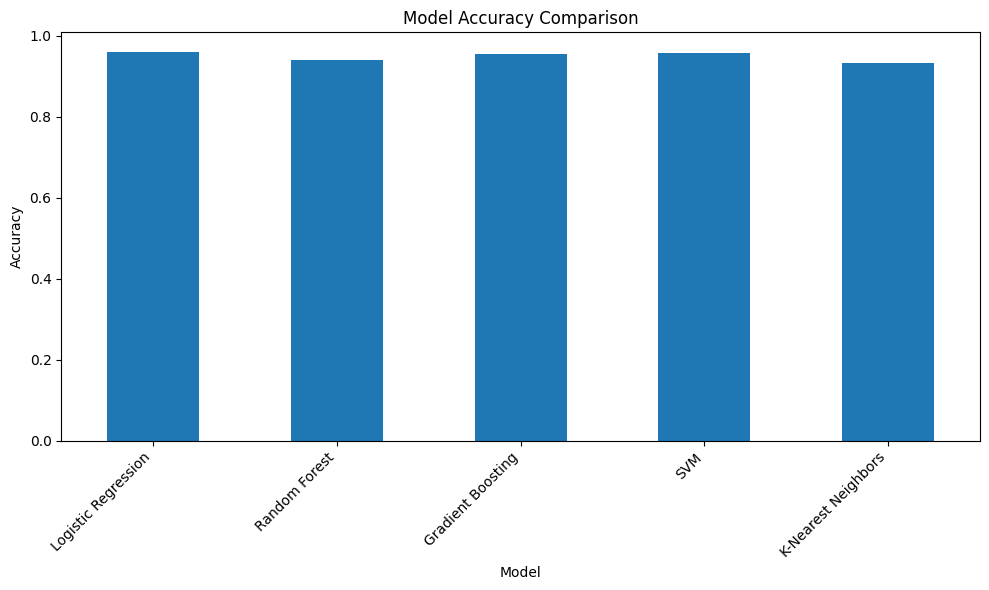

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
evaluation_df['Accuracy'].plot(kind='bar')
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

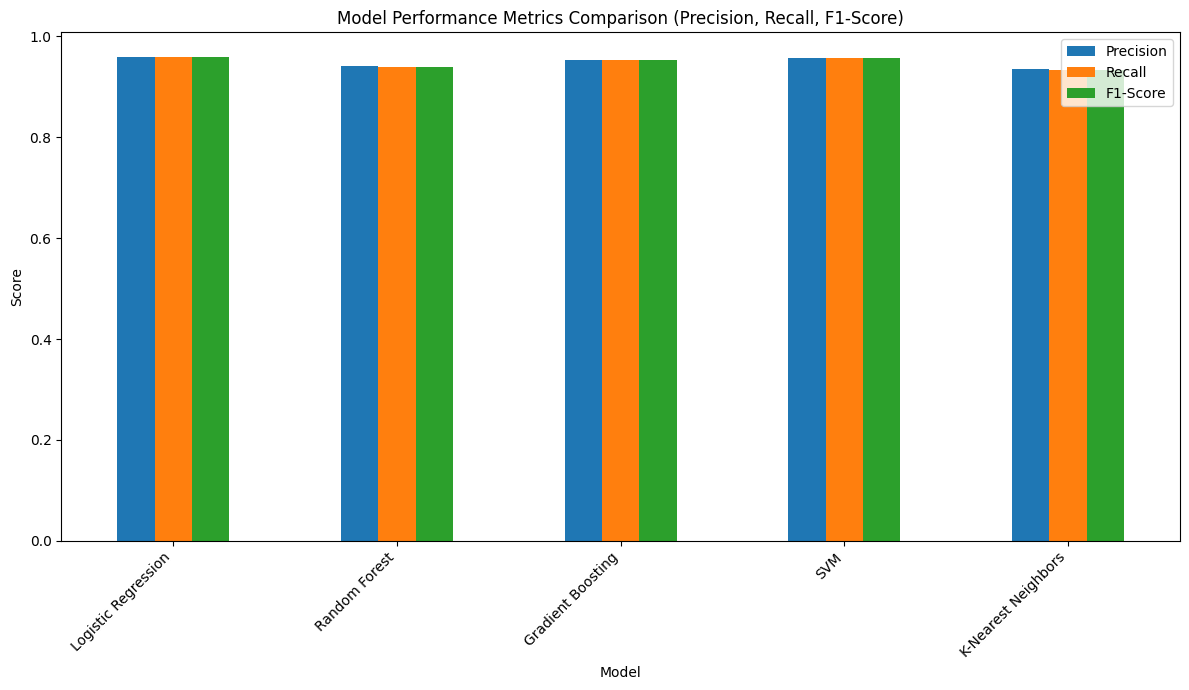

In [ ]:
import matplotlib.pyplot as plt

metrics_to_plot = evaluation_df[['Precision', 'Recall', 'F1-Score']]

plt.figure(figsize=(12, 7))
metrics_to_plot.plot(kind='bar', figsize=(12, 7))
plt.title("Model Performance Metrics Comparison (Precision, Recall, F1-Score)")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Displaying Confusion Matrix for: Logistic Regression


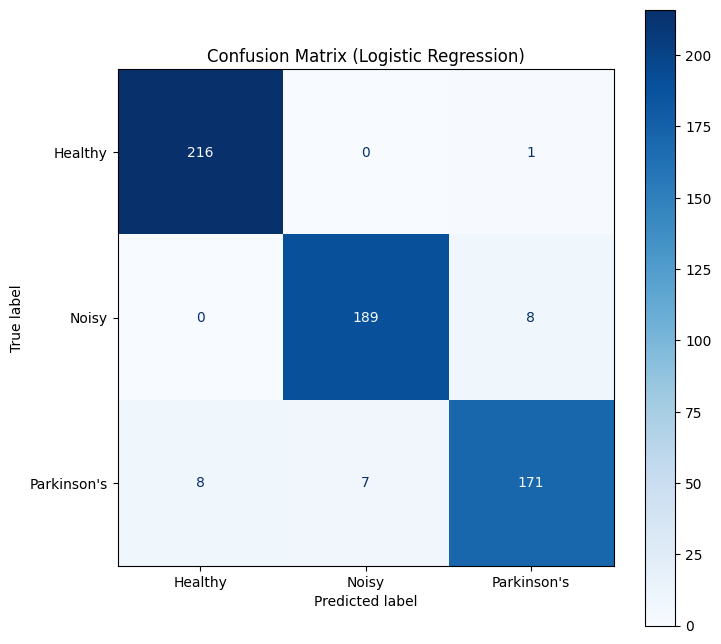

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'models', 'X_test', and 'y_test' are available from previous cells.

try:
    # Find the best model based on accuracy (re-evaluating or assuming results from previous cell)
    results = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc

    best_model_name = max(results, key=results.get)
    best_model = models[best_model_name]

    print(f"Displaying Confusion Matrix for: {best_model_name}")

    # Generate predictions with the best model
    y_pred_best = best_model.predict(X_test)

    # Get classes
    # Ensure class_names (['Healthy', 'Noisy', "Parkinson's"]) is accessible here
    # Assuming class_names is available from a previous cell. If not, redefine or import.
    # For robustness, let's derive display_labels from unique values in y_test
    unique_labels = np.unique(y_test)
    # Assuming class_names variable exists and matches numerical labels 0, 1, 2
    # Re-indexing class_names to match the sorted unique_labels if they are not already aligned.
    if 'class_names' in globals() and len(class_names) == len(unique_labels):
        display_labels = [class_names[int(l)] for l in unique_labels]
    else:
        # Fallback if class_names isn't perfectly aligned or not defined
        display_labels = [f'Class {int(l)}' for l in unique_labels]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_best, labels=unique_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 8)) # Adjust figure size for better readability
    disp.plot(cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix ({best_model_name})') # Set title on the Axes object
    plt.show()

except NameError as e:
    print(f"Error: {e}. Make sure the models, X_test, and y_test are loaded/defined in previous cells.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


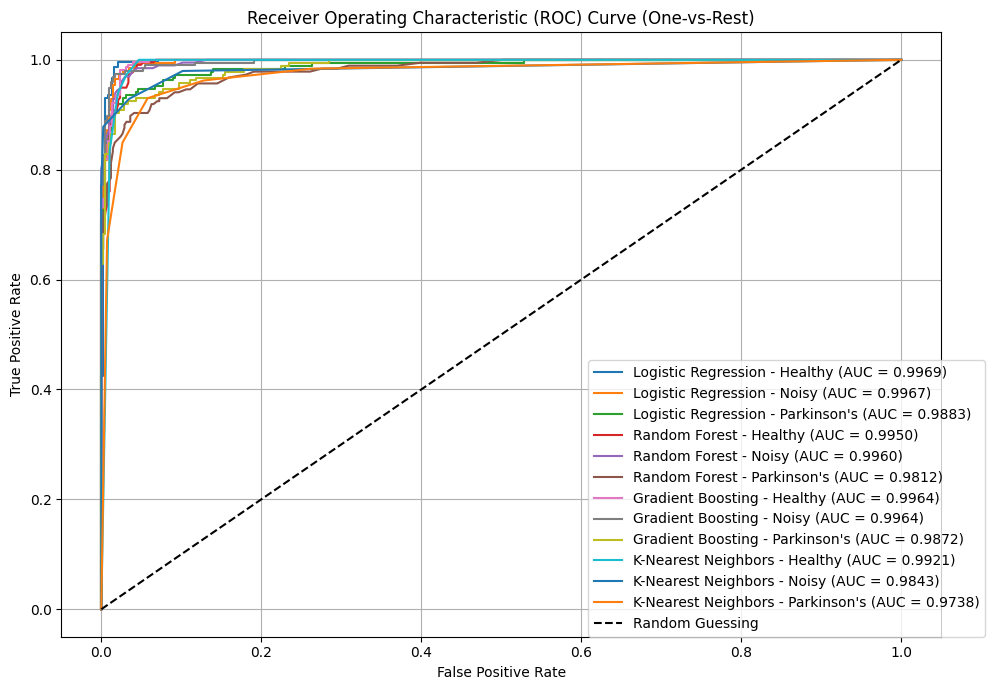

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer # For One-vs-Rest strategy

# Assuming 'models', 'X_test', and 'y_test' are available from previous cells.
# Also assuming 'class_names' is available from the CNN preprocessing cell for labels

plt.figure(figsize=(10, 7))

# Binarize labels for One-vs-Rest ROC curve calculation
# If class_names is not defined globally, you might need to infer it or load it.
# Assuming `class_names` (e.g., ['Healthy', 'Noisy', "Parkinson's"]) is available.
if 'class_names' not in globals():
    # Fallback if class_names is not available in the global scope
    unique_labels = np.unique(y_test)
    class_names = [f'Class {int(l)}' for l in unique_labels]

# Use LabelBinarizer to convert multiclass labels to a binary format for each class
label_binarizer = LabelBinarizer()
y_test_binarized = label_binarizer.fit_transform(y_test)

# Iterate through the trained models
for name, model in models.items():
    # Get predicted probabilities
    if hasattr(model, "predict_proba"):
        y_prob_all_classes = model.predict_proba(X_test) # Corrected: use X_test here
    elif hasattr(model, "decision_function"):
        # For SVM with decision_function, you'd need a more complex conversion for OvR
        # For now, we'll skip models without predict_proba that don't directly support OvR AUC easily
        print(f"Warning: Model {name} does not have predict_proba. Skipping ROC curve.")
        continue

    # Calculate ROC curve for each class using the One-vs-Rest strategy
    for i in range(len(class_names)):
        # The true binary labels for class i
        y_true_class_i = y_test_binarized[:, i]
        # The predicted probabilities for class i
        y_prob_class_i = y_prob_all_classes[:, i]

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_true_class_i, y_prob_class_i)

        # Calculate AUC (Area Under the Curve)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve for this class
        plt.plot(fpr, tpr, label=f'{name} - {class_names[i]} (AUC = {roc_auc:.4f})')

# Plot the diagonal random guessing line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
plt.legend(loc='lower right', bbox_to_anchor=(1.05, 0), borderaxespad=0.) # Adjust legend position for many entries
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


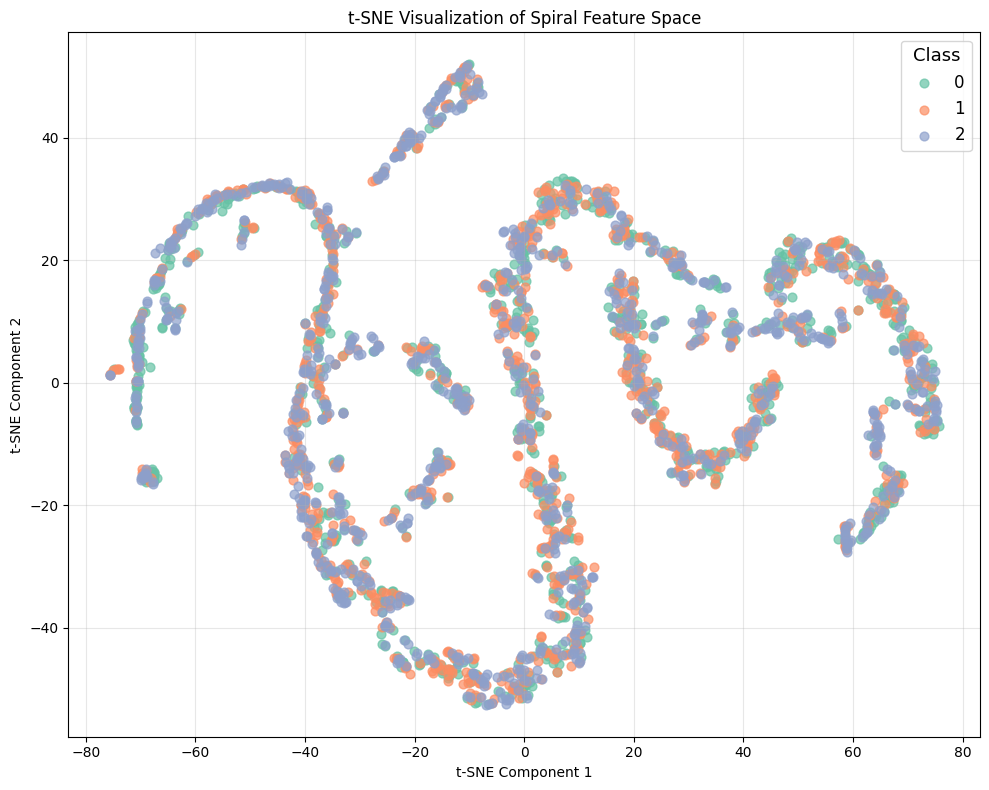

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Run t-SNE dimensionality reduction on the feature matrix
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Prepare class labels for color mapping
if hasattr(y, 'values'):
    y_array = y.values
else:
    y_array = y

unique_classes = np.unique(y_array)
palette = sns.color_palette("Set2", len(unique_classes))

plt.figure(figsize=(10, 8))
for i, class_val in enumerate(unique_classes):
    plt.scatter(
        X_embedded[y_array == class_val, 0],
        X_embedded[y_array == class_val, 1],
        label=str(class_val),
        alpha=0.7,  # transparency for better visibility
        s=40,  # point size
        c=[palette[i]]
    )

plt.legend(title="Class", fontsize=12, title_fontsize=13)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Spiral Feature Space')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


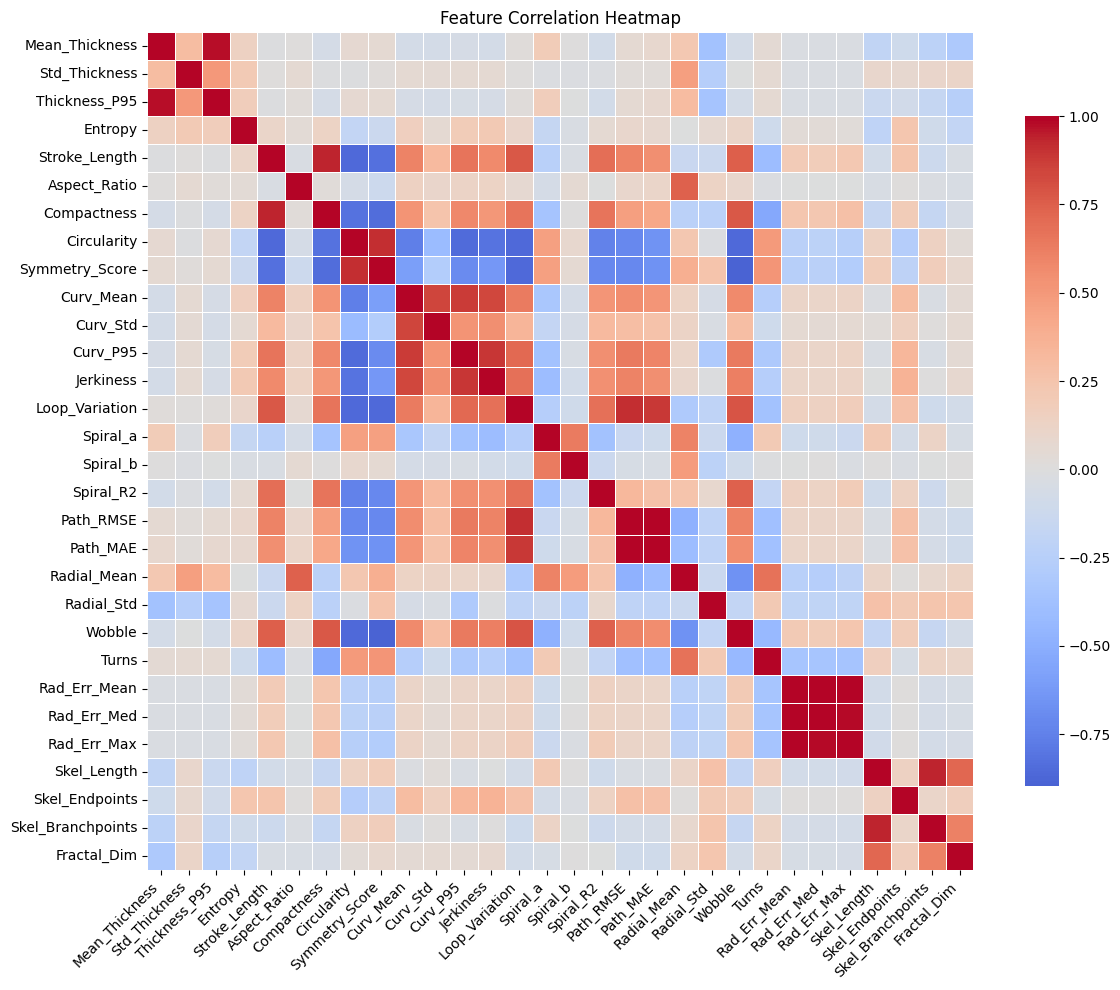

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame after preprocessing (from lDi0pMd1m3r5 cell)
# Create a new DataFrame containing only numeric feature columns
# Drop 'Image' (string) and 'Label' (target variable, typically not included in feature-feature correlation)
feature_only_df = df.drop(columns=['Image', 'Label'])

plt.figure(figsize=(12, 10))
corr_matrix = feature_only_df.corr() # Calculate correlation on numeric features only

# Draw the heatmap
sns.heatmap(
    corr_matrix,
    annot=False,             # Set to True if you want to see correlation values, but can be cluttered for many features
    fmt=".2f",              # number format
    cmap='coolwarm',        # color scheme (use 'vlag', 'viridis', etc. as you prefer)
    center=0,               # center colormap at zero correlation
    linewidths=0.5,         # lines between cells
    cbar_kws={"shrink": 0.8}
)

plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
pip install shap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- Load Dataset ---
df = pd.read_csv("/content/spiral_feature_best_columns.csv")

# Inspect columns
print(df.head())
print(df.info())

     Image  Label  Mean_Thickness  Std_Thickness  Thickness_P95   Entropy  \
0  378.jpg      1        0.792686       0.577403       0.870933 -0.230381   
1  156.jpg      1       -0.166584      -0.165015      -0.202815  0.365747   
2  398.jpg      1       -0.417269      -0.373347      -0.440168 -0.333458   
3  153.jpg      1        0.069304       0.782894       0.334932  0.569324   
4  402.jpg      1        1.327045       1.130902       1.325338 -0.336035   

   Stroke_Length  Aspect_Ratio  Compactness  Circularity  ...  Rad_Err_Max  \
0      -0.349832     -0.032272    -0.258526     0.415034  ...    -0.077419   
1      -0.349832     -0.032272    -0.258526     0.415034  ...    -0.077419   
2      -0.349832     -0.032272    -0.258526     0.415034  ...    -0.077419   
3      -0.349832     -0.032272    -0.258526     0.415034  ...    -0.077419   
4      -0.349832     -0.032272    -0.258526     0.415034  ...    -0.077419   

   Skel_Length  Skel_Endpoints  Skel_Branchpoints  Fractal_Dim  \
0 

/tmp/ipython-input-1364390843.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


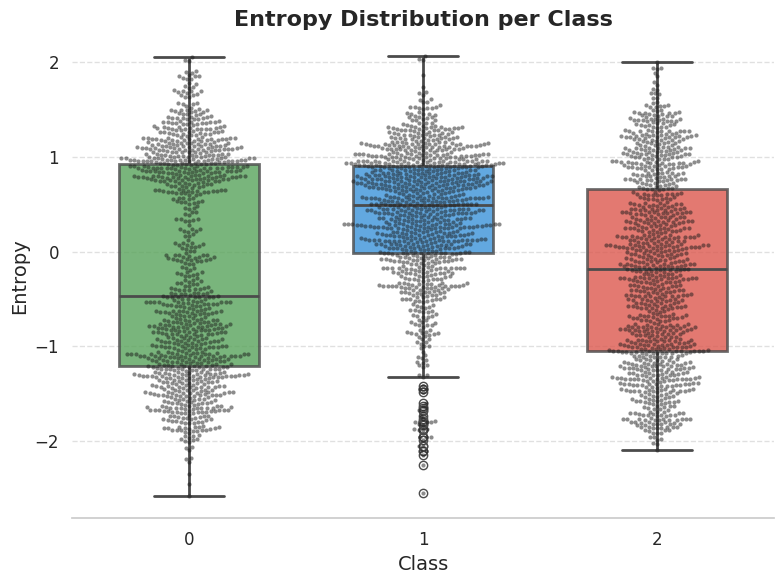

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

# ✅ Update with your correct file path
feature_csv_path = "/content/spiral_feature_best_columns.csv"

# Check if file exists before loading
if os.path.exists(feature_csv_path):
    features_df = pd.read_csv(feature_csv_path)

    if 'Label' in features_df.columns:
        features_df = features_df.rename(columns={'Label': 'Class'})

    if 'Entropy' in features_df.columns and 'Class' in features_df.columns:
        # Set a clean and modern style
        sns.set_theme(style="whitegrid", palette="pastel")

        plt.figure(figsize=(8,6))
        ax = sns.boxplot(
            x='Class',
            y='Entropy',
            data=features_df,
            palette=['#4CAF50', '#2196F3', '#F44336'],  # Custom colors
            linewidth=2,
            width=0.6,
            boxprops=dict(alpha=0.8)
        )

        # Add swarmplot for distribution dots (optional but visually rich)
        sns.swarmplot(
            x='Class',
            y='Entropy',
            data=features_df,
            color='k',
            alpha=0.5,
            size=3
        )

        # Styling
        plt.title('Entropy Distribution per Class', fontsize=16, fontweight='bold')
        plt.xlabel('Class', fontsize=14)
        plt.ylabel('Entropy', fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        sns.despine(left=True)

        plt.tight_layout()
        plt.show()
    else:
        print("Error: Required columns ('Class' or 'Entropy') missing.")
else:
    print(f"❌ File not found at: {feature_csv_path}")

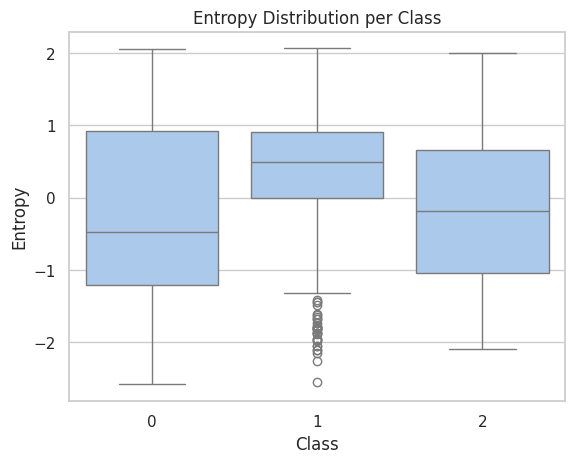

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
# Assuming the feature extraction CSV is at this path based on previous cells
feature_csv_path = "/content/spiral_feature_best_columns.csv"
try:
    features_df = pd.read_csv(feature_csv_path)

    # Rename the 'Label' column to 'Class' for clarity in the plot
    features_df = features_df.rename(columns={'Label': 'Class'})

    # Optional: Map numerical labels back to meaningful names if needed for the plot
    # Assuming 0: Healthy, 1: Parkinson, others might be 'Noisy'
    # Based on the feature extraction code, labels are 'Healthy', 'Parkinson', 'Noisy' strings
    # So renaming 'Label' to 'Class' is sufficient if the original strings are kept.

    # Clean data if necessary (e.g., handle NaNs, though the extraction code handles some)
    # Depending on the state of your CSV, you might need:
    # features_df = features_df.dropna(subset=['Entropy', 'Class']) # Example for this plot

    # Now generate the boxplot
    sns.boxplot(x='Class', y='Entropy', data=features_df)
    plt.title('Entropy Distribution per Class')
    plt.show()

except FileNotFoundError:
    print(f"Error: The file {feature_csv_path} was not found. Please ensure the feature extraction was successful.")
except KeyError as e:
    print(f"Error: Column {e} not found in the dataframe. Please check the column names in your CSV.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

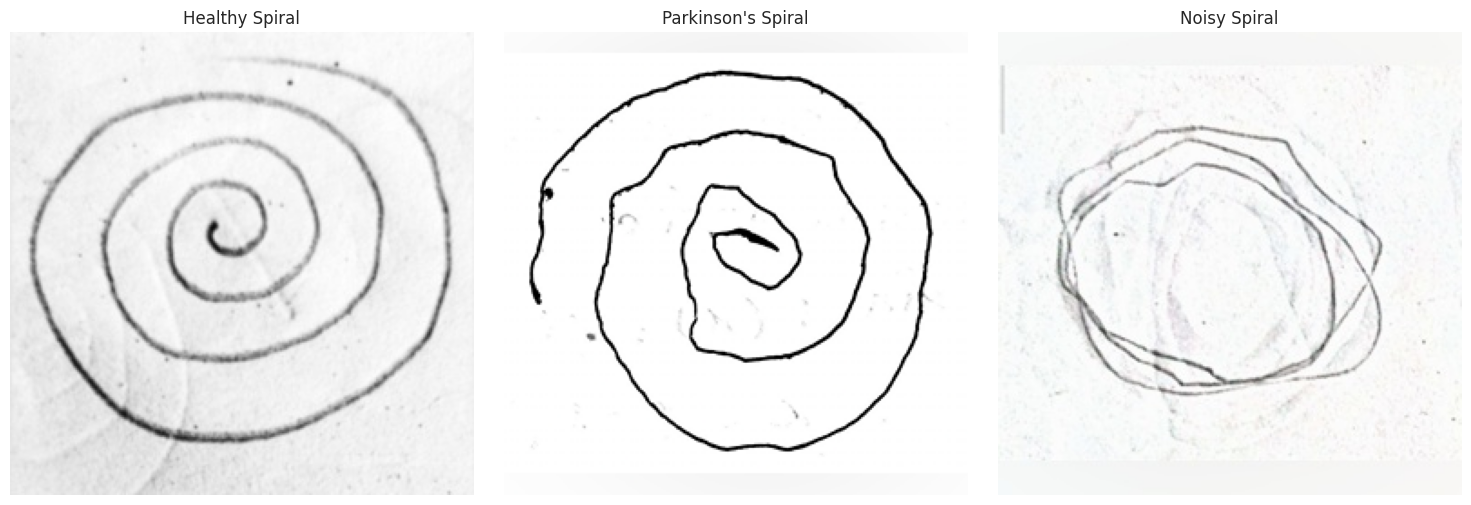

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import random

# Base dataset directory (adjust if your folder names differ)
base_dataset_path = "/content/drive/MyDrive/Defense_2/DATASET_2"

# Define class subfolders
classes = ["Healthy", "Parkinson's", "Noisy"]

# Create a figure for displaying all 3 samples
plt.figure(figsize=(15, 5))

for i, cls in enumerate(classes):
    class_path = os.path.join(base_dataset_path, cls)

    if os.path.exists(class_path):
        img_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if img_files:
            img_path = os.path.join(class_path, random.choice(img_files))
            img = cv2.imread(img_path)
            if img is not None:
                plt.subplot(1, 3, i+1)
                plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                plt.title(f"{cls} Spiral")
                plt.axis("off")
            else:
                plt.subplot(1, 3, i+1)
                plt.text(0.5, 0.5, f"Error loading {cls} image", ha='center', va='center', fontsize=12)
                plt.axis("off")
        else:
            plt.subplot(1, 3, i+1)
            plt.text(0.5, 0.5, f"No images in {cls} folder", ha='center', va='center', fontsize=12)
            plt.axis("off")
    else:
        plt.subplot(1, 3, i+1)
        plt.text(0.5, 0.5, f"Folder not found:\n{cls}", ha='center', va='center', fontsize=12)
        plt.axis("off")

plt.tight_layout()
plt.show()


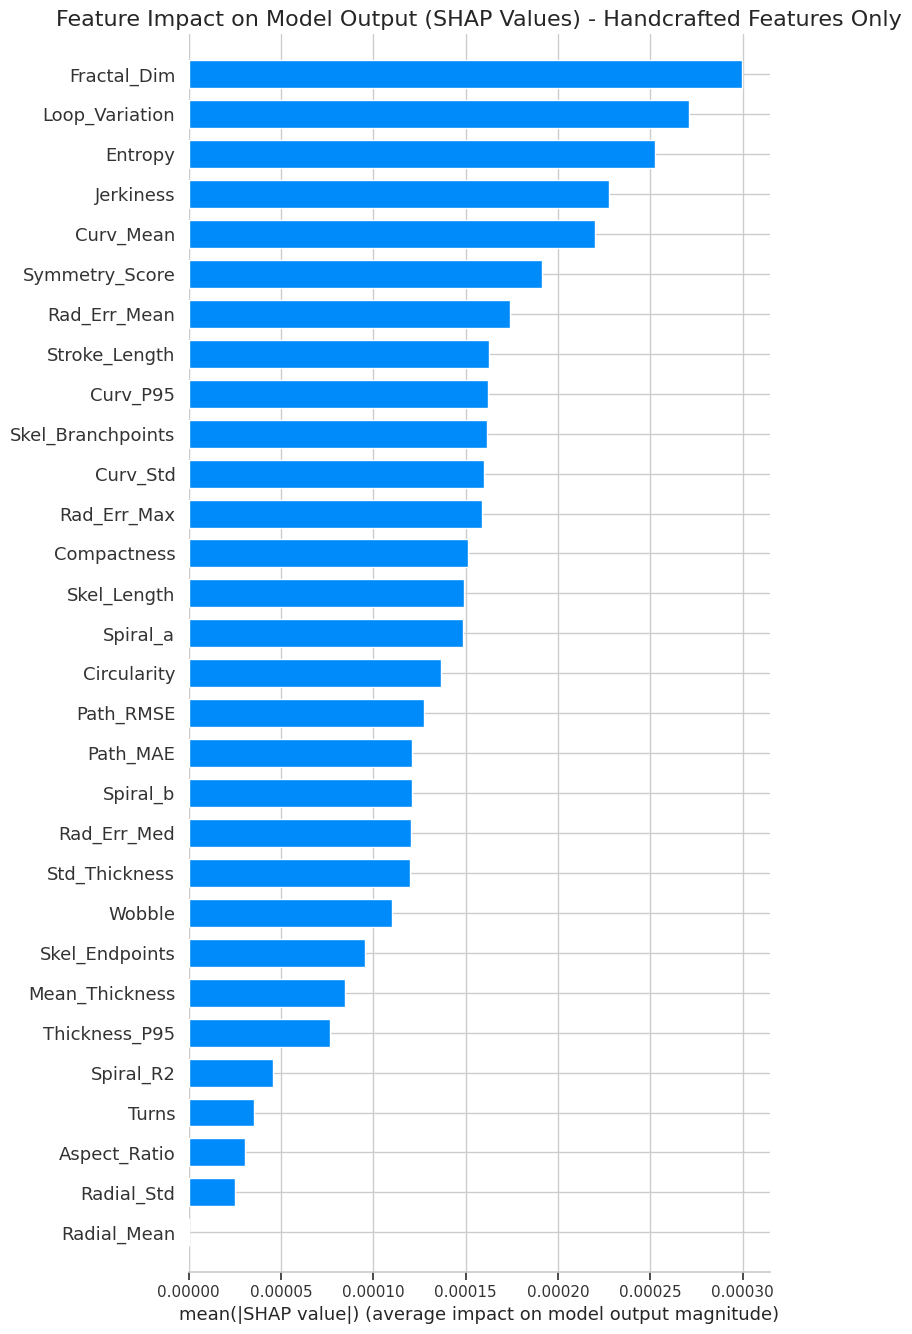

In [ ]:
import matplotlib.pyplot as plt
import shap
import pandas as pd

# Ensure shap_values_to_plot and X_scaled_df are available
if 'shap_values_to_plot' not in locals() or 'X_scaled_df' not in locals():
    print("Error: shap_values_to_plot or X_scaled_df not found. Please run previous cells.")
else:
    # Get handcrafted feature names (already defined in previous cells)
    feature_csv = "/content/spiral_feature_dataset.csv"
    handcrafted_df_template = pd.read_csv(feature_csv).drop(columns=["Image", "Label"])
    handcrafted_feature_names = handcrafted_df_template.columns.tolist()

    # Filter X_scaled_df to get only handcrafted features
    X_handcrafted_df = X_scaled_df[handcrafted_feature_names]

    # Filter shap_values_to_plot to correspond to handcrafted features
    # We need to find the indices of handcrafted features in the full list
    # Assuming 'all_feature_names' from the previous cell is still available
    num_cnn_features = 512 # As defined previously
    start_idx_handcrafted = num_cnn_features
    end_idx_handcrafted = num_cnn_features + len(handcrafted_feature_names)

    shap_values_handcrafted = shap_values_to_plot[:, start_idx_handcrafted:end_idx_handcrafted]

    plt.figure(figsize=(12, 10))

    # Generate SHAP summary plot for handcrafted features
    shap.summary_plot(
        shap_values_handcrafted,
        X_handcrafted_df, # Pass the DataFrame of handcrafted features
        plot_type="bar",
        max_display=len(handcrafted_feature_names), # Display all handcrafted features
        show=False # Set to False to control display with plt.show()
    )
    plt.title("Feature Impact on Model Output (SHAP Values) - Handcrafted Features Only", fontsize=16)
    plt.tight_layout()
    plt.show()